# **YOLOv11 Defect Detection - Android Deployment**
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/erwincarlogonzales/defect-detection-yolov11/blob/main/yolov11_defect_detection.ipynb)

## Why Google Colab?

This notebook is specifically designed to run on Google Colab to leverage its affordable T4 GPU resources, making it accessible for developers without high-end local GPU hardware (such as me). Here's why:

1. **GPU Requirements**
   - YOLO training requires significant GPU compute power
   - Local training without a CUDA-capable GPU would be impractical (at least for this project. I'm a struggling PhD student)
   - The T4 GPU provided by Colab offers ~8.1 TFLOPS of compute performance

2. **Cost-Effective Development**
   - Free and/or affordable access to enterprise-grade GPU
   - No need to invest in expensive hardware during development
   - Perfect for prototyping and initial model training

3. **Environment Setup**
   - Pre-configured deep learning environment
   - CUDA and cuDNN already installed
   - Common ML libraries pre-installed
   - Minimal setup required to start training

4. **Collaborative Features**
   - Easy sharing of notebooks
   - Real-time collaboration possible
   - Version control through Google Drive
   - Seamless integration with other Google services

5. **Resource Allocation**
   - Up to 12 hours of continuous GPU access
   - 12GB of GPU memory
   - Sufficient for training medium-sized YOLO models

Note: While Colab is excellent for development and initial training, production deployment might require dedicated hardware or cloud resources for consistent performance and availability.

## Why DagsHub over AWS SageMaker?

This project utilizes DagsHub instead of AWS SageMaker for several strategic reasons:

1. **Cost Considerations**
   - DagsHub offers free tier for MLOps capabilities
   - No AWS infrastructure costs
   - Perfect for proof-of-concept and research projects
   - Avoids complex AWS billing structures
   - *Remember I'm a struggling PhD student*

2. **MLflow Integration**
   - Native MLflow support without setup overhead
   - Free MLflow hosting with experiment tracking
   - Easy model versioning and artifact storage
   - Built-in visualization of training metrics

3. **Simplified MLOps Pipeline**
   - Git-centric workflow familiar to developers
   - Integrated experiment tracking
   - No need for separate MLOps infrastructure
   - Reduced DevOps complexity

4. **Development Workflow**
   - Seamless integration with Google Colab
   - Direct model artifact storage
   - Easy sharing of results with stakeholders
   - Version control and collaboration in one platform

5. **Accessibility**
   - No AWS expertise required
   - Simpler learning curve
   - Quick setup for new team members
   - Public/private repository options

6. **Deployment Flexibility**
   - Models can still be deployed anywhere
   - Export options for production environments
   - Not locked into AWS ecosystem
   - Easy integration with edge devices like Jetson Nano and Android

Note: While AWS SageMaker offers more enterprise features and scalability, DagsHub provides the right balance of functionality and simplicity for this development phase. Consider migrating to SageMaker if enterprise-scale deployment becomes necessary.

## Recent Updates

### December 31, 2024
1. Added AI assistance for code generation:
   - Using Claude 3.5 Sonnet, GPT4o, and GPTo1

2. Setting up credentials (Important!):
   - Look for the Secrets icon in Google Colab (key icon on the left)
   - There's also a backup .env file in the Google Drive

3. Added experiment tracking (MLFlow):
   - Using dagshub to store everything online

4. Links:
   - Main tracking page: https://dagshub.com/erwincarlogonzales/defect-detection-yolov11.mlflow
   - Code repository: https://dagshub.com/erwincarlogonzales/defect-detection-yolov11

5. Finding the best model:
   - Step 1: Go to defect-detection-yolov11s-android
   - Step 2: In Run name select yolo11s-40-50
   - Step 3: Go to "models"
   - Step 4: Find "defect-detection-v11-android-production"
   - Step 5: Look for Version 3 named `yolo11s-40-50`
   - Note: Picked this one because it's fast but still accurate

6. Where to find your results:
   - For main results:
     MLflow UI > defect-detection-yolov11s-android > select model > artifacts
   - For extra details:
     MLflow UI > /Shared/Ultralytics > select train > artifacts

### January 2, 2025
- Tested different models and found the best one:
  - Tried different training times (30, 40, and 100 rounds)
  - Tested different confidence levels (25% vs 50%)
  - Champion: 40 epochs with 50% confidence threshold
- See results here: https://dagshub.com/erwincarlogonzales/defect-detection-yolov11.mlflow/#/experiments/0/runs/56a4a7a5e91546e7908a3ed36fb74127/artifacts

### January 7, 2025
- Updated to work on Jetson Nano (using ONNX instead of PyTorch)
- Check MLFlow dashboard > select a model > models > artifacts
- Important: Check the section called "Train model with MLflow tracking"

### January 8, 2025
- Added `early_stopping` dictionary on CONFIG
- traning stopped at 33 epochs instead of 40
- Finished notebook outline

### January 9, 2025
- Removed `early_stopping` dictionary on CONFIG and set to `patience` to avoid unnecessesary nesting in `train_yolo_model` function
- Added step-by-step instructions on how to get run_id and set model to challenger before promotion (See ModelRegistration)
- Retrained the model

### January 26, 2025
- Added save model to TFLite for android deployment

## How to Start
1. Open the notebook
2. Set runtime by going to EDIT > Notebook Settings > T4GPU
3. Find "Configuration Settings" in the Table of Contents
4. Set parameters
5. Run the notebook until Prediction Generation
6. Register Model and get run_id
7. Set best version to challenger in MLFlow
8. Promote challenger to champion for production

## **1. Setup and Configuration**

### **Package Installation and Imports**

In [1]:
# Install required packages
!pip install ultralytics supervision roboflow mlflow python-dotenv matplotlib seaborn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.6/913.6 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.3/28.3 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 637.5/637.5 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.

In [ ]:
# Import necessary libraries
import os
import time
import glob
import torch
import mlflow
from typing import Dict, Union
from ultralytics import YOLO
from IPython.display import Image as IPyImage, display
from dotenv import load_dotenv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
import numpy as np
import tensorflow as tf

from dataclasses import dataclass
from typing import Optional

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### **MLflow Setup**

In [3]:
# Set up MLflow credentials using Colab secrets
from google.colab import userdata
import os

# User defined inputs
MLFLOW_TRACKING_URI = 'https://dagshub.com/erwincarlogonzales/defect-detection-yolov11.mlflow'
EXPERIMENT_NAME = 'defect-detection-yolov11s-android'

# Get credentials and set environment variables
try:
    os.environ.update({
        'MLFLOW_TRACKING_URI': MLFLOW_TRACKING_URI,
        'MLFLOW_TRACKING_USERNAME': userdata.get('MLFLOW_TRACKING_USERNAME'),
        'MLFLOW_TRACKING_PASSWORD': userdata.get('MLFLOW_TRACKING_PASSWORD')
    })

    # Verify MLflow connection
    mlflow.set_experiment(EXPERIMENT_NAME)
    print(f"Successfully connected to MLflow {MLFLOW_TRACKING_URI}")
    print(f"Using experiment: {EXPERIMENT_NAME}")

except Exception as error:
    if 'userdata.get' in str(error):
        raise Exception(f"Failed to get secrets from Colab: {error}")
    raise ConnectionError(f'MLflow setup failed: {error}')

Successfully connected to MLflow https://dagshub.com/erwincarlogonzales/defect-detection-yolov11.mlflow
Using experiment: defect-detection-yolov11s-android


### **Hardware Verification**

In [4]:
# Check GPU availability
!nvidia-smi

Sun Jan 26 13:28:35 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### **Configuration Settings**
- Dataset URL configuration
- Model parameters = user inputs (type, epochs, image size, confidence threshold)
- Early stopping settings (patience) YOLO does not have `early_stopping` parameter

### **Model Name Generation**
- `generate_model_name()`: Creates standardized model names from configuration

In [ ]:
# Configuration
"""
Configuration dictionary for YOLO object detection model training.

Parameters:
    dataset_url (str): URL to Roboflow dataset containing the training images and annotations.
    model_type (str): Specification of YOLO model architecture to use (yolo11s.pt). LINK to models https://docs.ultralytics.com/models/yolo11/#supported-tasks-and-modes
    epochs (int): Number of complete passes through the training dataset.
    image_size (int): Input image resolution. Images will be resized to this dimension.
    conf_threshold (float): Confidence threshold between 0 and 1. Detections with confidence
                          scores below this value will be discarded.
    patience (int): Number of epochs to wait for improvement before early stopping is triggered.
                  Training will stop if no improvement is seen for this many consecutive epochs.

Note:
    - Image size should be a multiple of 32 for optimal YOLO performance
    - Confidence threshold of 0.50 is a standard starting point, adjust based on application needs
"""
CONFIG = {
    'dataset_url': 'https://app.roboflow.com/ds/JgwZ6J3BBV?key=Q4LLoOljfi',
    'model_type': 'yolo11s.pt',
    'epochs': 33,
    'image_size': 640,
    'conf_threshold': 0.50,
    'patience': 3
}

def generate_model_name(config: Dict[str, Union[str, int, float]], separator: str = "-") -> str:
    """Generate model name from config using model_type, epochs, and confidence threshold.

    Args:
        config (Dict[str, Union[str, int, float]]): Configuration dictionary containing:
            - model_type (str): The model type (e.g. 'yolo11s.pt')
            - epochs (int): Number of training epochs
            - conf_threshold (float): Confidence threshold (e.g. 0.25)
        separator (str, optional): Separator between components. Defaults to "-".

    Returns:
        str: Generated model name in format 'model_type{separator}epochs{separator}conf'

    Example:
        >>> config = {'model_type': 'yolo11s.pt', 'epochs': 100, 'conf_threshold': 0.25}
        >>> generate_model_name(config)
        'yolo11s-100-25'
    """
# Validate epochs value
    if not isinstance(config.get('epochs'), int) or config['epochs'] <= 0:
        raise ValueError("epochs must be a positive integer")

    # Get model type from config, default to empty string
    model_type = config.get('model_type', '')

    # Validate model type
    if not model_type or '.' not in model_type:
        raise ValueError("model_type must be a non-empty string with a file extension")

    # Extract model type without extension
    model_type = model_type.split('.')[0]

    # Get confidence threshold from config, default to 0.25
    conf_threshold = config.get('conf_threshold', 0.25)

    # Convert confidence threshold to integer percentage
    conf_value = str(int(conf_threshold * 100))  # Convert 0.25 to "25"

    # Construct and return the model name
    return f"{model_type}{separator}{config['epochs']}{separator}{conf_value}"

### **Directory Setup**
- Working directory configuration
- Dataset directory creation and management

In [6]:
# Set up working directory and dataset
HOME = os.getcwd()
print(f'Working Directory: {HOME}')

# Create dataset directory
!mkdir {HOME}/datasets
%cd {HOME}/datasets

Working Directory: /content
/content/datasets


In [7]:
# Download and extract Roboflow dataset
%%time
!curl -L '{CONFIG['dataset_url']}' > roboflow.zip 2>/dev/null
!unzip -q roboflow.zip
!rm roboflow.zip

# Return to home directory
%cd {HOME}

/content
CPU times: user 39.1 ms, sys: 4.62 ms, total: 43.8 ms
Wall time: 4.5 s


### **Visualization Functions**
- `plot_confusion_matrix_heatmap()`: Creates confusion matrix visualizations
- `plot_training_metrics()`: Generates training metrics plots
- `extract_yolo_metrics()`: Extracts final metrics from YOLO results

In [8]:
# Visualization Functions
def plot_confusion_matrix_heatmap(confusion_matrix, labels=['No Defect', 'Defect']):
    """
    Create and save confusion matrix heatmap
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix Heatmap')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    heatmap_path = f'{HOME}/confusion_matrix_heatmap.png'
    plt.savefig(heatmap_path)
    plt.close()

    return heatmap_path

def plot_training_metrics(results_file):
    """
    Create and save training metrics over time from YOLO results
    """
    # Load results from YOLO's CSV file
    results = pd.read_csv(results_file)

    plt.figure(figsize=(15, 8))
    metrics_to_plot = {
        'metrics/precision(B)': 'Precision',
        'metrics/recall(B)': 'Recall',
        'metrics/mAP50(B)': 'mAP@0.5',
        'metrics/mAP50-95(B)': 'mAP@0.5:0.95'
    }

    for col, label in metrics_to_plot.items():

        if col in results.columns:
            plt.plot(results.index, results[col], label=label, marker='o')

    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training Metrics Over Time')
    plt.grid(True)
    plt.legend()

    metrics_path = f'{HOME}/training_metrics.png'
    plt.savefig(metrics_path)
    plt.close()

    return metrics_path

def extract_yolo_metrics(results_file):
    """
    Extract final metrics from YOLO results.

    Args:
        results_file (str): Path to the YOLO results CSV file.

    Returns:
        dict: A dictionary containing the final precision, recall, mAP@0.5, and mAP@0.5:0.95.
    """
    # Load results from the CSV file into a pandas DataFrame
    results = pd.read_csv(results_file)

    # Get the last row of the DataFrame, which represents the final epoch's results
    final_epoch = results.iloc[-1]

    # Create a dictionary to store the final metrics
    # Access specific columns from the 'final_epoch' Series using column names
    return {
        'final_precision': final_epoch['metrics/precision(B)'],
        'final_recall': final_epoch['metrics/recall(B)'],
        'final_mAP50': final_epoch['metrics/mAP50(B)'],
        'final_mAP50-95': final_epoch['metrics/mAP50-95(B)']
    }

### **Training Support Functions**
- `log_training_params()`: Logs model parameters to MLflow
- `train_yolo_model()`: Handles YOLO model training
- `get_latest_train_dir()`: Retrieves most recent training directory
- `process_confusion_matrix()`: Processes and logs confusion matrix data
- `process_training_metrics()`: Processes and logs training metrics
- `log_yolo_artifacts()`: Logs YOLO artifacts to MLflow
- `display_training_results()`: Shows training visualizations
- `display_predictions()`: Displays model predictions

In [9]:
# Helper functions
def log_training_params(config):
    """
    Log model training parameters to MLflow.

    Args:
        config (dict): Configuration dictionary containing training parameters.
    """
    # Log key parameters to MLflow for tracking and reproducibility
    mlflow.log_params({
        'model_type': config['model_type'],         # The type of YOLO model used
        'epochs': config['epochs'],                 # Number of training epochs
        'image_size': config['image_size'],         # Image size used for training
        'conf_threshold': config['conf_threshold']  # Confidence threshold for detections
    })

def train_yolo_model(config):
    """
    Train YOLO model and return training time
    """
    start_time = time.time()

    # Disable MLflow callback before training to avoid conflicts
    from ultralytics.utils.callbacks.mlflow import callbacks as mlflow_callbacks
    mlflow_callbacks.clear()

    # Start YOLO training using the command-line interface
    !yolo task=detect mode=train \
        model={config['model_type']} \
        data=/content/datasets/data.yaml \
        epochs={config['epochs']} \
        imgsz={config['image_size']} \
        patience={config['patience']} \
        plots=True

    return time.time() - start_time

def get_latest_train_dir(home_dir):
    """
    Get the most recent training directory.

    Args:
        home_dir (str): Path to the home directory where YOLO training results are stored.

    Returns:
        str: Path to the most recent training directory.

    Raises:
        FileNotFoundError: If no training directories are found.
    """
    # Use glob to find all directories matching the pattern 'runs/detect/train*'
    train_dirs = glob.glob(f'{home_dir}/runs/detect/train*')

    # If no training directories are found, raise an exception
    if not train_dirs:
        raise FileNotFoundError("No training directories found")

    # Return the directory with the latest modification time
    # (using os.path.getmtime as the key for the max function)
    return max(train_dirs, key=os.path.getmtime)

def process_confusion_matrix(home_dir):
    """
    Process and log confusion matrix metrics to MLflow.

    Args:
        home_dir (str): Path to the home directory where YOLO training results are stored.

    Returns:
        numpy.ndarray or None: The confusion matrix if found, otherwise None.
    """
    # Get the most recent training directory
    latest_dir = get_latest_train_dir(home_dir)

    # Construct the path to the confusion matrix file within the latest training directory
    confusion_matrix_path = f'{latest_dir}/confusion_matrix.npy'

    # Check if the confusion matrix file exists
    if not os.path.exists(confusion_matrix_path):
        print(f'WARNING: Confusion matrix not found at: {confusion_matrix_path}')
        return None  # Return None if the file is not found

    # Load the confusion matrix from the file
    confusion_matrix = np.load(confusion_matrix_path)

    # Create and log a heatmap visualization of the confusion matrix
    heatmap_path = plot_confusion_matrix_heatmap(confusion_matrix)
    mlflow.log_artifact(heatmap_path, 'visualizations')

    # Calculate and log confusion matrix metrics (TP, TN, FP, FN)
    tn, fp, fn, tp = confusion_matrix.ravel()  # Flatten the matrix
    metrics = {
        'true_positives': tp,
        'true_negatives': tn,
        'false_positives': fp,
        'false_negatives': fn
    }
    mlflow.log_metrics(metrics)

    # Return the confusion matrix
    return confusion_matrix

def process_training_metrics(home_dir):
    """
    Process and log training metrics to MLflow.

    Args:
        home_dir (str): Path to the home directory where YOLO training results are stored.
    """
    # Get the most recent training directory
    latest_dir = get_latest_train_dir(home_dir)

    # Construct the path to the results CSV file within the latest training directory
    results_file = f'{latest_dir}/results.csv'

    # Check if the results file exists
    if not os.path.exists(results_file):
        print(f'WARNING: Results file not found at: {results_file}')
        return  # Return early if the file is not found

    # Create and log a plot of the training metrics over time
    metrics_path = plot_training_metrics(results_file)
    mlflow.log_artifact(metrics_path, 'visualizations')

    # Extract and log final YOLO metrics (precision, recall, mAP)
    yolo_metrics = extract_yolo_metrics(results_file)
    mlflow.log_metrics(yolo_metrics)

def log_yolo_artifacts(home_dir):
    """
    Log YOLO's generated artifacts to MLflow.

    Args:
        home_dir (str): Path to the home directory where YOLO training results are stored.
    """
    # Get the most recent training directory
    latest_dir = get_latest_train_dir(home_dir)
    print(f"Logging artifacts from: {latest_dir}")

    # Define a dictionary mapping artifact names to their file paths
    artifact_paths = {
        'confusion_matrix': f'{latest_dir}/confusion_matrix.png',
        'results': f'{latest_dir}/results.png',
        'validation_predictions': f'{latest_dir}/val_batch0_pred.jpg'
    }

    # Log each artifact to MLflow if it exists
    logged_artifacts = 0  # Initialize a counter for logged artifacts

    for name, path in artifact_paths.items():   # Iterate through the artifact paths
        if os.path.exists(path):                # Check if the artifact file exists
            mlflow.log_artifact(path, name)     # Log the artifact to MLflow
            logged_artifacts += 1               # Increment the logged artifacts counter
            print(f"Successfully logged {name}")  # Print a success message
        else:
            print(f'WARNING: Artifact not found: {path}')  # Print a warning if not found

def display_training_results(width: int = 800, height=None, show_titles: bool = True):
    """
    Display training results (confusion matrix, training metrics, and validation predictions)
    in the notebook.

    Args:
        width (int, optional): Width of the displayed images. Defaults to 800.
        height (int, optional): Height of the displayed images. If None, the height is automatically adjusted. Defaults to None.
        show_titles (bool, optional): Whether to display titles above the images. Defaults to True.
    """
    # Get the most recent training directory
    latest_dir = get_latest_train_dir(HOME)
    print(f"Loading results from: {latest_dir}")

    # Define a dictionary mapping image titles to their file paths
    results_config = {
        'Confusion Matrix': f'{latest_dir}/confusion_matrix.png',
        'Training Results': f'{latest_dir}/results.png',
        'Validation Batch Predictions': f'{latest_dir}/val_batch0_pred.jpg'
    }

    # Check if each image file exists and store it in 'available_images' if it does
    available_images = {}
    for title, path in results_config.items():
        if os.path.exists(path):
            available_images[title] = path
        else:
            print(f"Warning: {title} not found at {path}")

    # If no image files were found, print a message and return
    if not available_images:
        print("No result images found to display")
        return

    # Create IPython Image objects for each available image
    images = [IPyImage(filename=path, width=width, height=height)
              for path in available_images.values()]

    # Display the images with or without titles
    if show_titles:
        for title, image in zip(available_images.keys(), images):
            print(f'\n{title}')
            display(image)
    else:
        display(*images)

def display_predictions(num_images: int = 3, image_width: int = 600):
    """
    Display the top prediction images from the most recent prediction run.

    Args:
        num_images (int, optional): Number of prediction images to display. Defaults to 3.
        image_width (int, optional): Width of the displayed images. Defaults to 600.
    """
    # Find all prediction folders using glob, sorting by modification time to get the latest
    prediction_folders = glob.glob('/content/runs/detect/predict*/')

    # Check if any prediction folders were found
    if not prediction_folders:
        print("No prediction folders found. Ensure the prediction step ran successfully.")
        return  # Return early if no folders are found

    # Get the most recent prediction folder based on modification time
    latest_folder = max(prediction_folders, key=os.path.getmtime)

    # Get a sorted list of prediction image paths within the latest folder
    pred_images = sorted(glob.glob(f'{latest_folder}/*.jpg'))

    # Print a heading indicating the number of predictions to be displayed
    print(f'Top {num_images} Predictions:\n')

    # Display the specified number of prediction images
    for img in pred_images[:num_images]:
        display(IPyImage(filename=img, width=image_width))  # Display the image using IPython.display.Image
        print('\n')  # Add a newline for spacing between images.

## **3. Model Pipeline Stages**

### **Model Training**
- MLflow run initialization
- Parameter logging
- Model training execution
- Implement full INT8 quantization for better performance on Android
- Saving model and Artifact logging (best model, last model)
- ONNX model export
- Metrics processing and logging

In [10]:
# # Train model with MLflow tracking - Pytorch and ONNYX (Jetson)
# %%time
# with mlflow.start_run(run_name=generate_model_name(CONFIG)) as run:  # Start a new MLflow run with a generated run name
#     try:
#         print("Starting training process...")

#         # 1. Log training parameters to MLflow
#         log_training_params(CONFIG)
#         print("Parameters logged successfully")

#         # 2. Train the YOLO model and log training time
#         print("Starting model training...")
#         training_time = train_yolo_model(CONFIG)
#         mlflow.log_metric('training_time', training_time)
#         print("Training completed")

#         # Give some time for files to be written (to avoid race conditions)
#         time.sleep(2)

#         # Save the best and last model files as MLflow artifacts
#         print("Saving model files...")
#         latest_dir = get_latest_train_dir(HOME)
#         model_paths = {
#             'best_model': f'{latest_dir}/weights/best.pt',
#             'last_model': f'{latest_dir}/weights/last.pt'
#         }
#         for name, path in model_paths.items():
#             if os.path.exists(path):
#                 mlflow.log_artifact(path, "models")
#                 print(f"Saved {name} successfully")
#             else:
#                 print(f'WARNING: Model file not found: {path}')

#         # Export and save ONNX model
#         print("Exporting to ONNX format...")
#         model = YOLO(f'{latest_dir}/weights/best.pt')
#         model.export(format='onnx',
#                     opset=11,
#                     simplify=True,
#                     dynamic=True,
#                     half=False)

#         # Log ONNX model to MLflow
#         onnx_path = f'{latest_dir}/weights/best.onnx'
#         if os.path.exists(onnx_path):
#             mlflow.log_artifact(onnx_path, "models")
#             print("ONNX model saved and logged successfully")
#         else:
#             print('WARNING: ONNX model file not found')

#         # 3. Process and log confusion matrix metrics
#         print("Processing confusion matrix...")
#         confusion_matrix = process_confusion_matrix(HOME)

#         # 4. Process and log training metrics (from results.csv)
#         print("Processing training metrics...")
#         process_training_metrics(HOME)

#         # 5. Log other YOLO artifacts (e.g., confusion matrix image, results plot)
#         print("Logging YOLO artifacts...")
#         log_yolo_artifacts(HOME)

#         print('Training and logging completed successfully!')

#     except Exception as error:
#         print(f'Error during training or logging: {str(error)}')
#         raise  # Re-raise the exception to stop execution and provide the error message

In [ ]:
# # Train model with MLflow tracking - TFLite (Android)
# %%time
# with mlflow.start_run(run_name=generate_model_name(CONFIG)) as run:
#     try:
#         print("Starting training process...")
#         log_training_params(CONFIG)
#         training_time = train_yolo_model(CONFIG)
#         mlflow.log_metric('training_time', training_time)

#         latest_dir = get_latest_train_dir(HOME)
#         model = YOLO(f'{latest_dir}/weights/best.pt')

#         print("Exporting to TFLite format...")
#         saved_model_path = f'{latest_dir}/weights/best_saved_model'
#         model.export(format='saved_model',
#                     half=False)

#         import tensorflow as tf
#         converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)

#         converter.optimizations = [tf.lite.Optimize.DEFAULT]
#         converter.target_spec.supported_types = [tf.float16]
#         converter.target_spec.supported_ops = [
#             tf.lite.OpsSet.TFLITE_BUILTINS,
#             tf.lite.OpsSet.SELECT_TF_OPS
#         ]

#         tflite_model = converter.convert()
#         tflite_path = f'{latest_dir}/weights/best.tflite'
#         with open(tflite_path, 'wb') as f:
#             f.write(tflite_model)

#         if os.path.exists(tflite_path):
#             mlflow.log_artifact(tflite_path, "models")
#             print("TFLite model saved and logged successfully")

#         print("Processing confusion matrix...")
#         confusion_matrix = process_confusion_matrix(HOME)
#         process_training_metrics(HOME)
#         log_yolo_artifacts(HOME)

#     except Exception as error:
#         print(f'Error during training or logging: {str(error)}')
#         raise

# Train model with MLflow tracking - TFLite (Android)
%%time
with mlflow.start_run(run_name=generate_model_name(CONFIG)) as run:
    try:
        print("Starting training process...")
        log_training_params(CONFIG)
        training_time = train_yolo_model(CONFIG)
        mlflow.log_metric('training_time', training_time)

        latest_dir = get_latest_train_dir(HOME)
        model = YOLO(f'{latest_dir}/weights/best.pt')

        print("Exporting to TFLite format...")
        saved_model_path = f'{latest_dir}/weights/best_saved_model'
        model.export(format='saved_model',
                    half=False)
        
        # Define representative dataset generator
        def representative_dataset_gen():
            # Get sample of validation/test images
            test_images_path = '/content/datasets/test/images/'
            test_files = os.listdir(test_images_path)[:100]  # Limit to 100 images
            
            for file in test_files:
                img_path = os.path.join(test_images_path, file)
                # Read and preprocess image
                img = tf.io.read_file(img_path)
                img = tf.image.decode_jpeg(img, channels=3)
                img = tf.image.resize(img, [CONFIG['image_size'], CONFIG['image_size']])
                img = img / 255.0  # Normalize to [0,1]
                img = tf.expand_dims(img, 0)  # Add batch dimension
                yield [img]

        converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)

        # Set optimization strategy
        converter.optimizations = [tf.lite.Optimize.DEFAULT]
        
        # Apply full integer quantization
        converter.representative_dataset = representative_dataset_gen
        converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
        converter.inference_input_type = tf.int8
        converter.inference_output_type = tf.int8

        tflite_model = converter.convert()
        tflite_path = f'{latest_dir}/weights/best_int8.tflite'
        with open(tflite_path, 'wb') as f:
            f.write(tflite_model)

        if os.path.exists(tflite_path):
            mlflow.log_artifact(tflite_path, "models")
            print("INT8 TFLite model saved and logged successfully")

        print("Processing confusion matrix...")
        confusion_matrix = process_confusion_matrix(HOME)
        process_training_metrics(HOME)
        log_yolo_artifacts(HOME)

    except Exception as error:
        print(f'Error during training or logging: {str(error)}')
        raise

Starting training process...
100% 18.4M/18.4M [00:00<00:00, 157MB/s]
Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/data.yaml, epochs=33, time=None, patience=3, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

100%|██████████| 1.11M/1.11M [00:00<00:00, 19.0MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 28.83file/s]



ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 2.8s, saved as '/content/runs/detect/train/weights/best.onnx' (36.2 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.26.3...
TensorFlow SavedModel: export success ✅ 110.2s, saved as '/content/runs/detect/train/weights/best_saved_model' (91.7 MB)

Export complete (112.9s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best_saved_model imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best_saved_model imgsz=640 data=/content/datasets/data.yaml  
Visualize:       https://netron.app
TFLite model saved and logged successfully
Processing confusion matrix...
Logging artifacts from: /content/runs/detect/train
Successfully logged confusion_matrix
Successfully logged results
Successfully logged validation_predictions
🏃 View run yolo11s-33-50

Loading results from: /content/runs/detect/train

Confusion Matrix


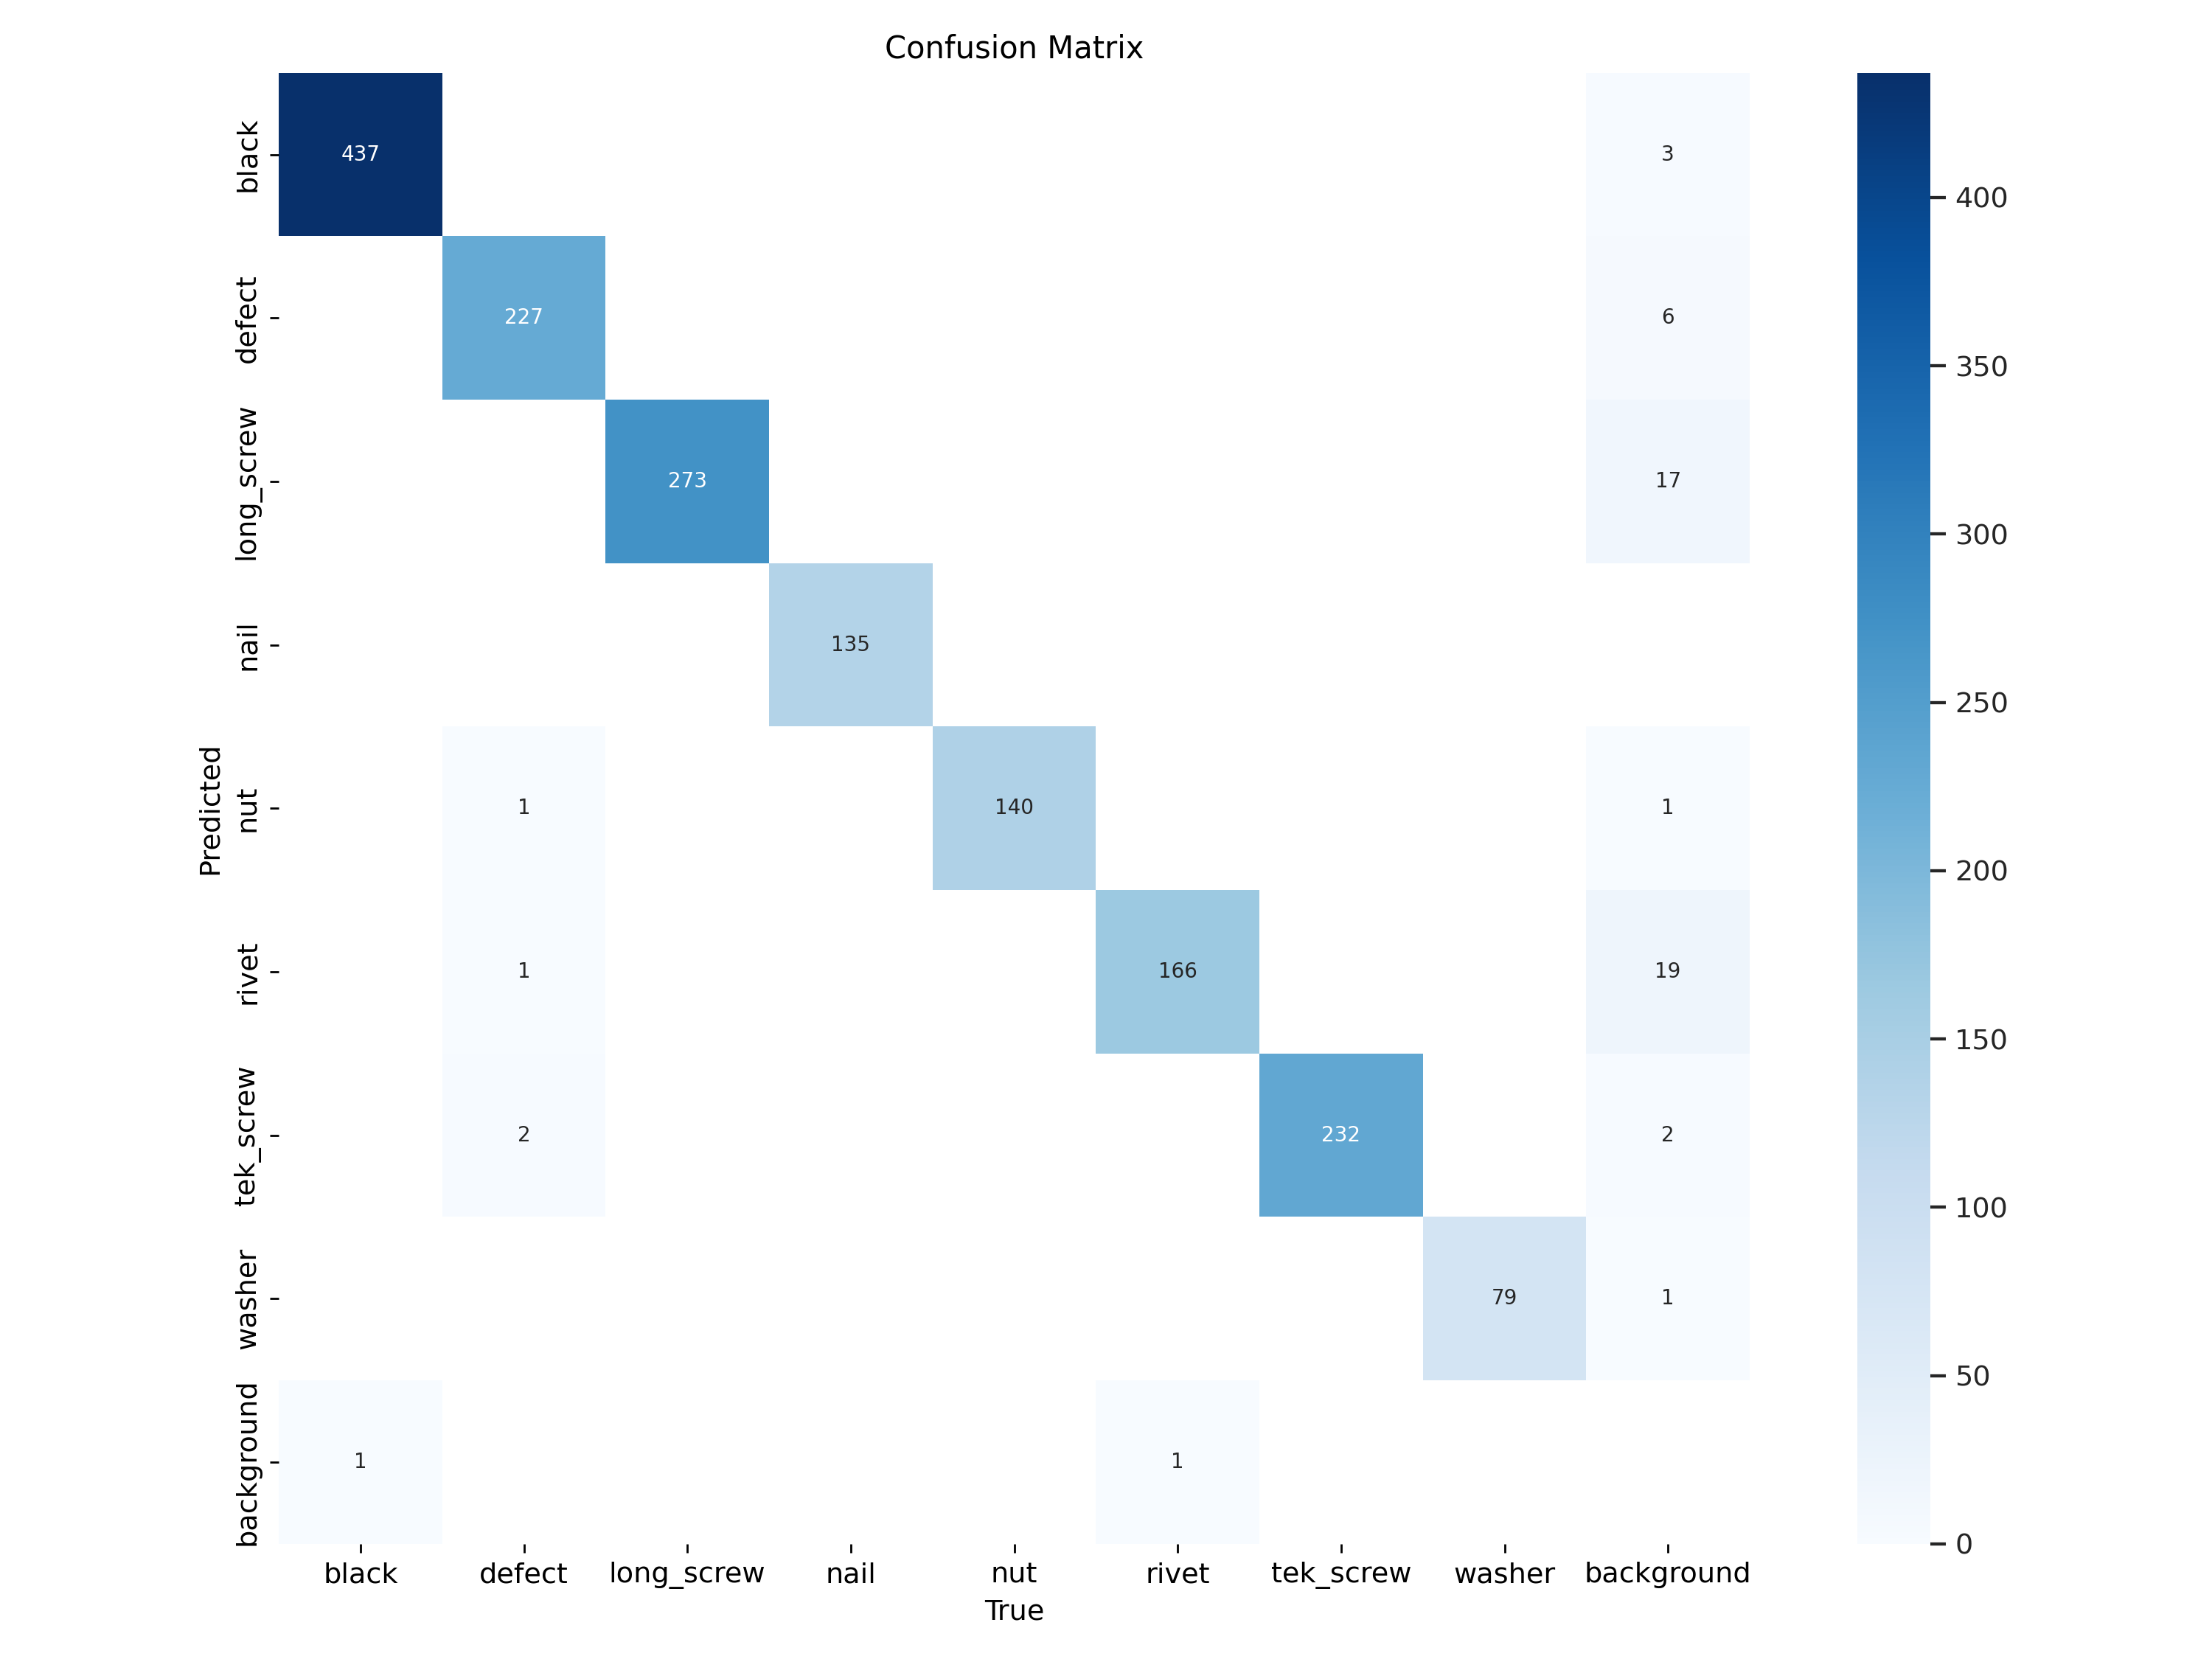


Training Results


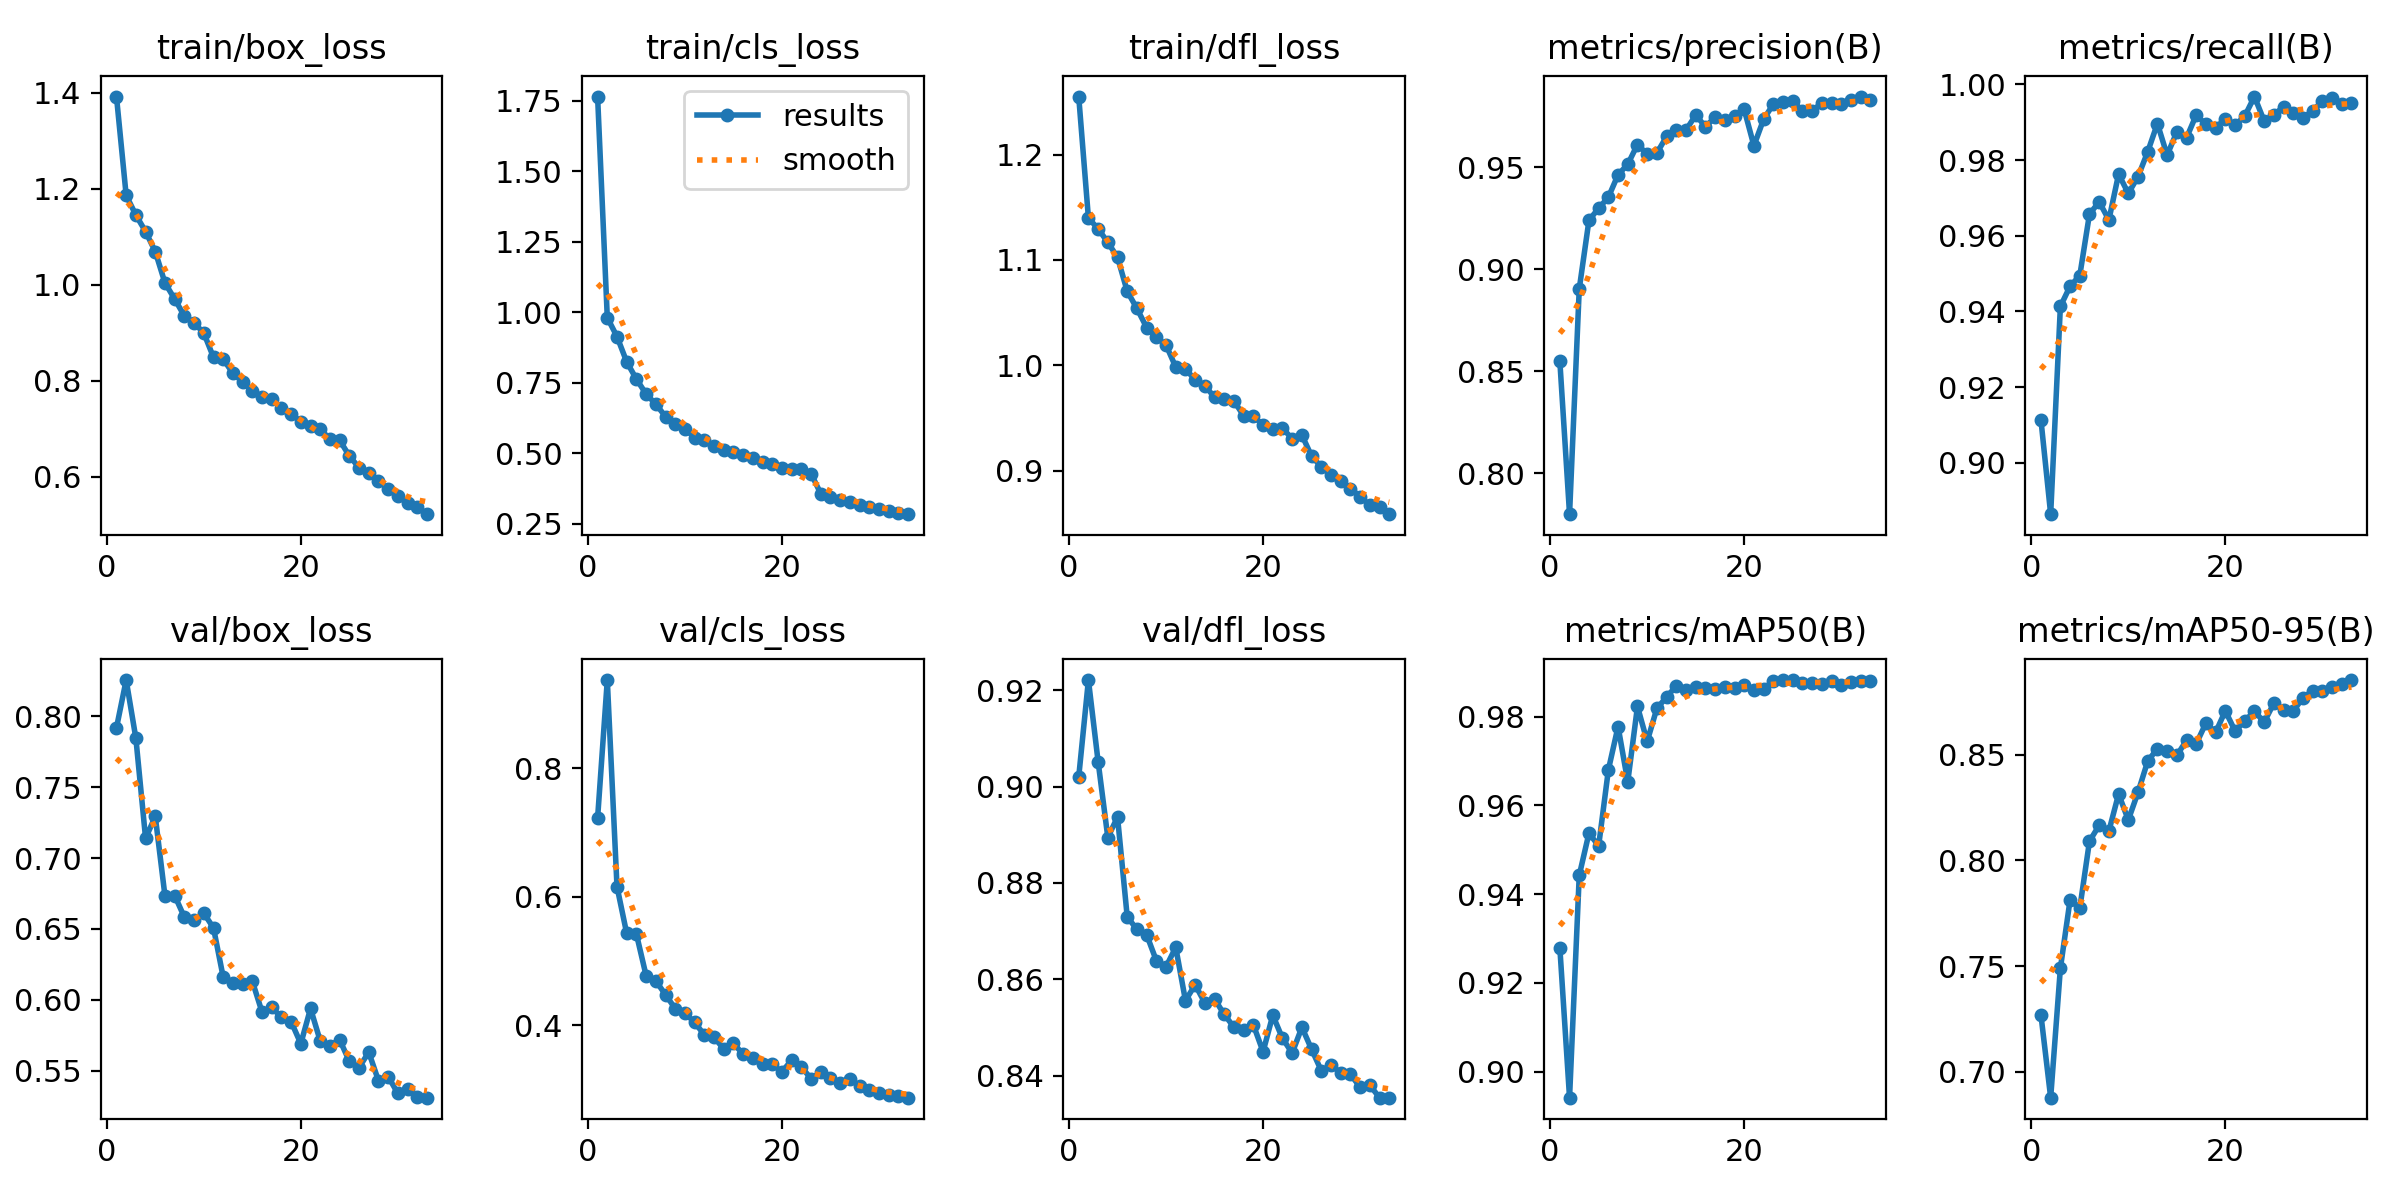


Validation Batch Predictions


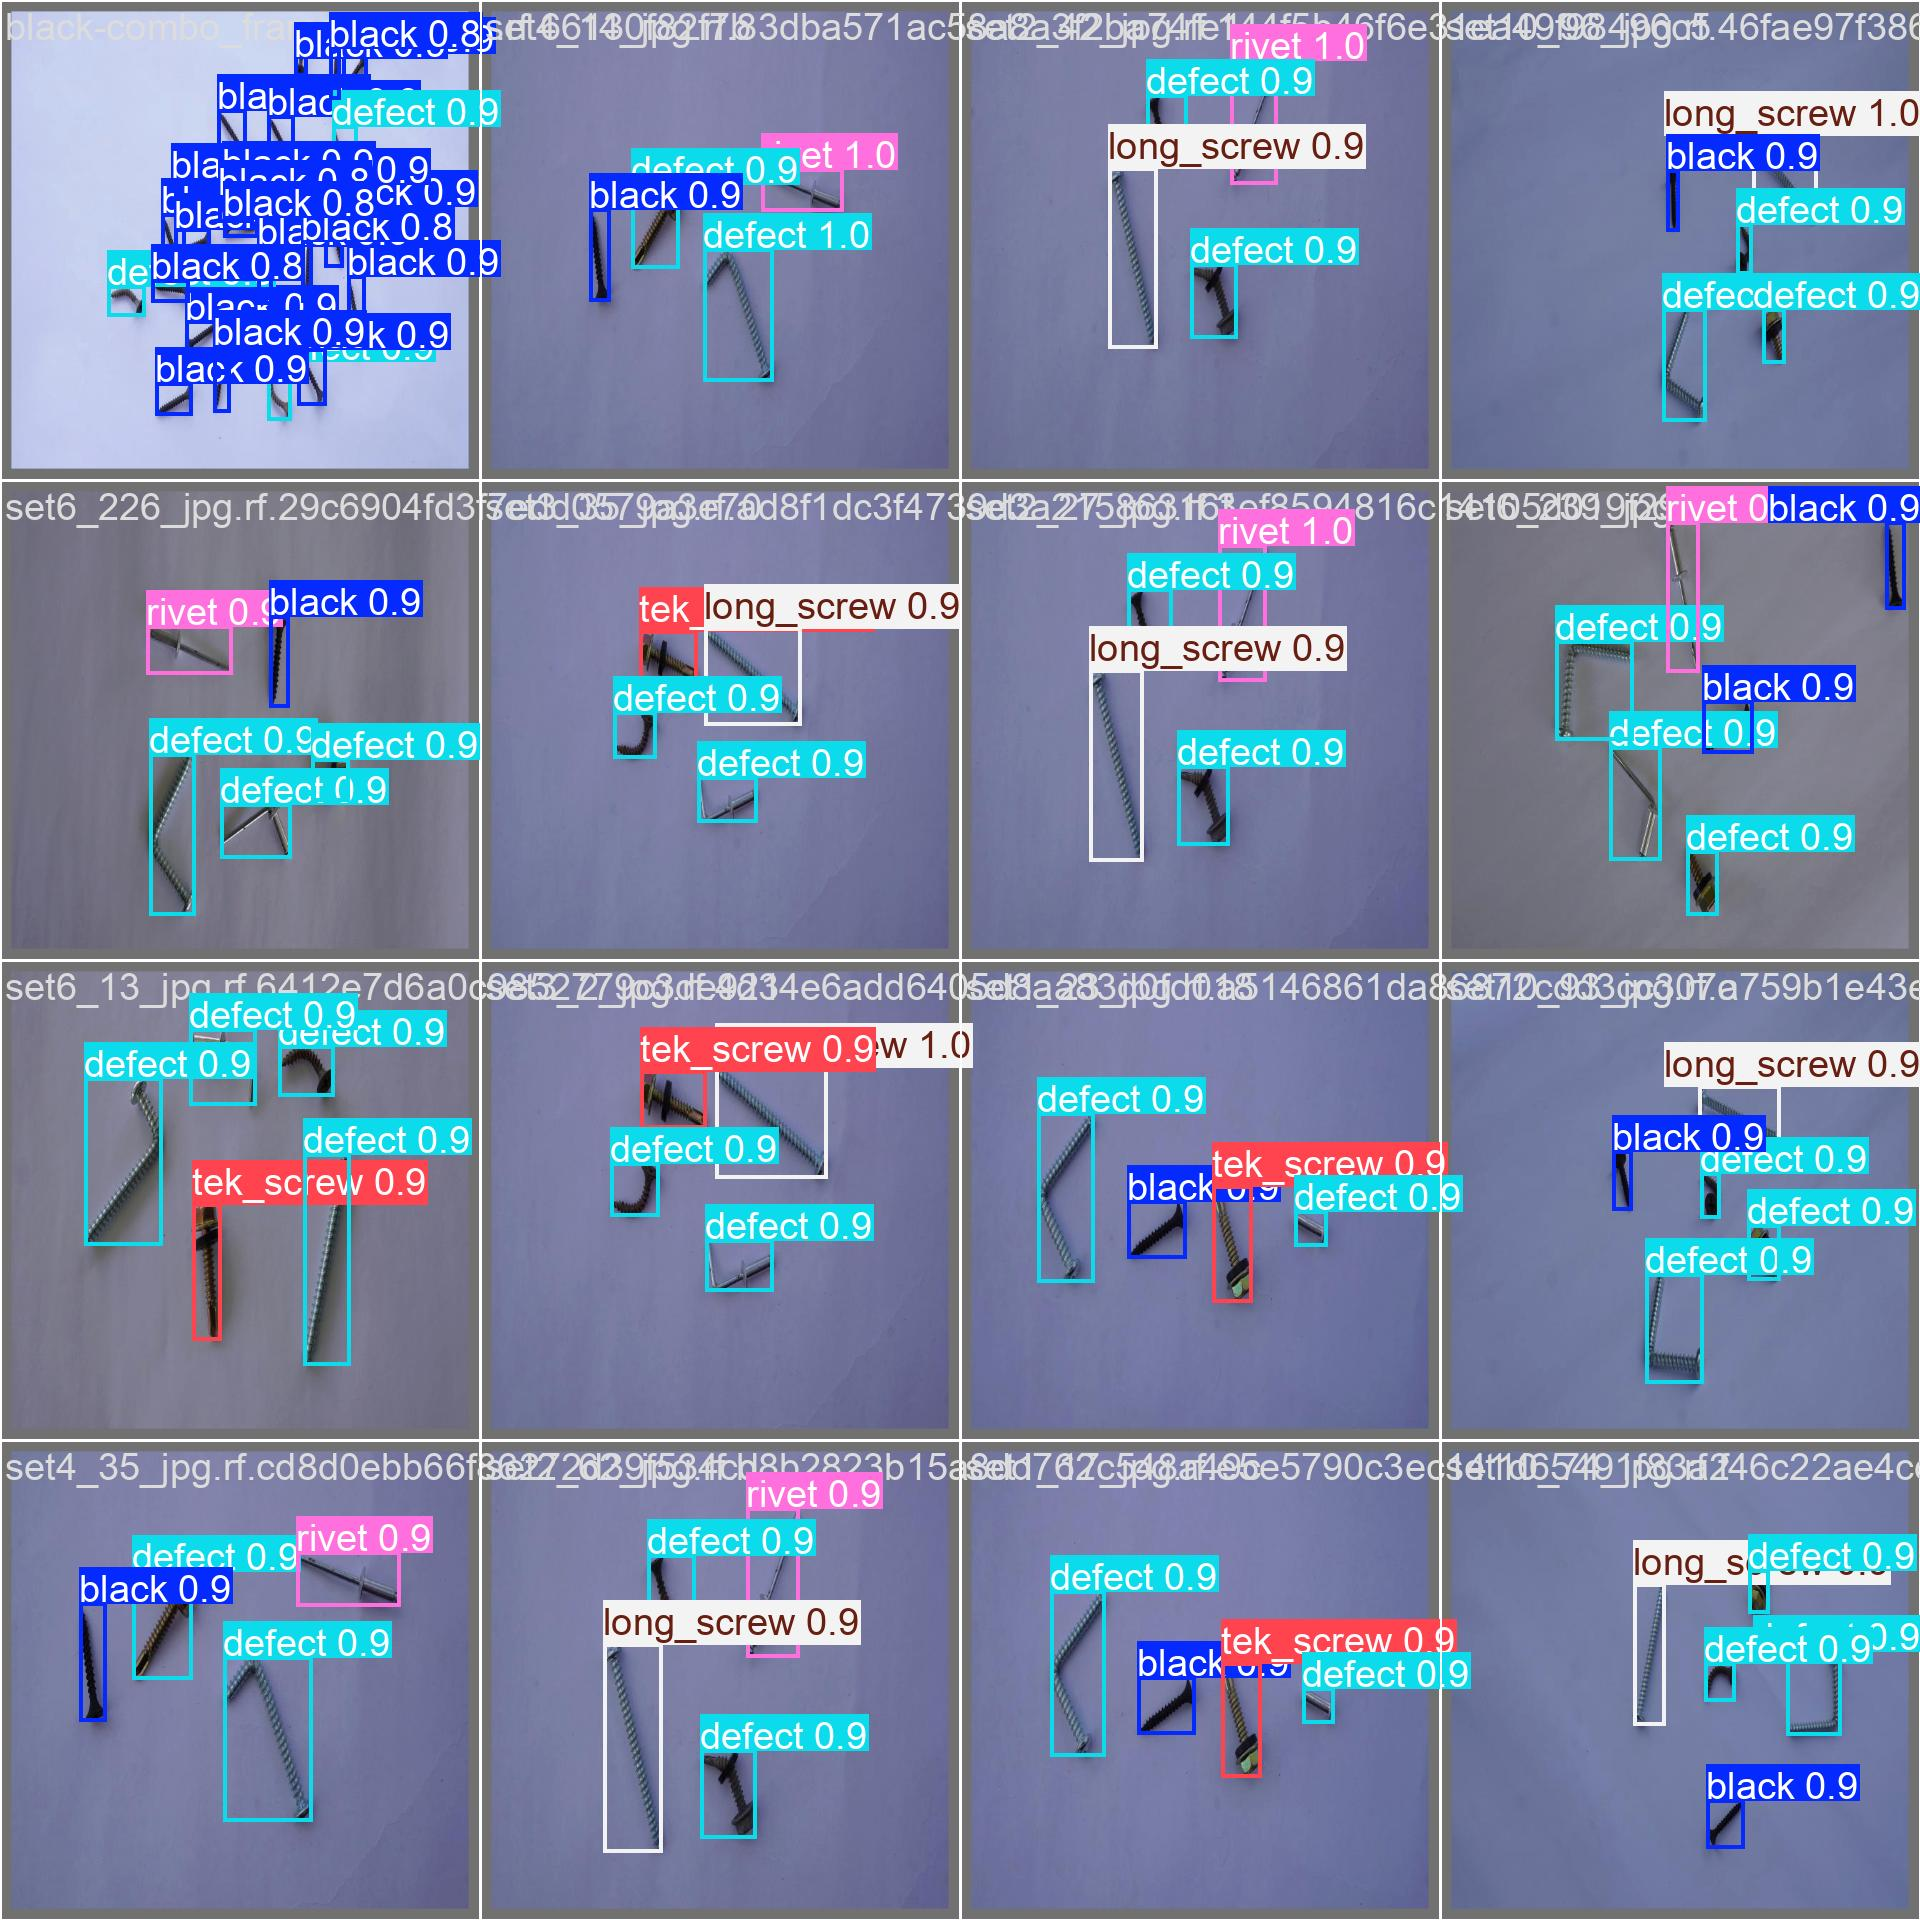

In [12]:
# Display training results function and execution
display_training_results()

### **Model Validation**
- Validation execution
- Validation time tracking
- Metric logging

In [13]:
# Validate model with MLflow tracking
%%time
with mlflow.start_run(run_id=run.info.run_id):  # Start a new MLflow run using the existing run ID

    start_time = time.time()  # Record the start time for validation

    !yolo task=detect mode=val \
        model={HOME}/runs/detect/train/weights/best.pt \
        data=/content/datasets/data.yaml

    validation_time = time.time() - start_time  # Calculate the validation time

    mlflow.log_metric('validation_time', validation_time)  # Log the validation time to MLflow

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.30GHz)
YOLO11s summary (fused): 238 layers, 9,415,896 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 121 images, 0 backgrounds, 0 corrupt: 100% 121/121 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [01:32<00:00, 11.55s/it]
                   all        121       1695      0.983      0.995      0.988      0.885
                 black         40        438          1      0.998      0.995       0.85
                defect         77        231       0.99      0.987      0.993      0.912
            long_screw         29        273      0.985      0.982      0.994      0.858
                  nail         15        135      0.997          1      0.995      0.925
                   nut         14        140       0.99          1      0.994      0.915
                 rivet         18        167      0.928  

### **Prediction Generation**
- Inference on test images
- Time tracking for predictions
- Results visualization

In [14]:
# Run predictions with MLflow tracking
%%time
with mlflow.start_run(run_id=run.info.run_id):  # Start a new MLflow run using the existing run ID

    start_time = time.time()  # Record the start time for inference

    # Run YOLO predictions using the command-line interface
    !yolo task=detect mode=predict \
        model={HOME}/runs/detect/train/weights/best.pt \
        conf={CONFIG['conf_threshold']} \
        source=/content/datasets/test/images \
        save=True > /dev/null 2>&1

    inference_time = time.time() - start_time  # Calculate the inference time

    mlflow.log_metric('inference_time', inference_time)  # Log the inference time to MLflow

print('Predictions completed!')  # Print a message indicating that predictions are finished

🏃 View run yolo11s-33-50 at: https://dagshub.com/erwincarlogonzales/defect-detection-yolov11.mlflow/#/experiments/3/runs/01f73422c25e4e939eb161bc68b37830
🧪 View experiment at: https://dagshub.com/erwincarlogonzales/defect-detection-yolov11.mlflow/#/experiments/3
Predictions completed!
CPU times: user 252 ms, sys: 37.9 ms, total: 290 ms
Wall time: 41.2 s


Top 3 Predictions:



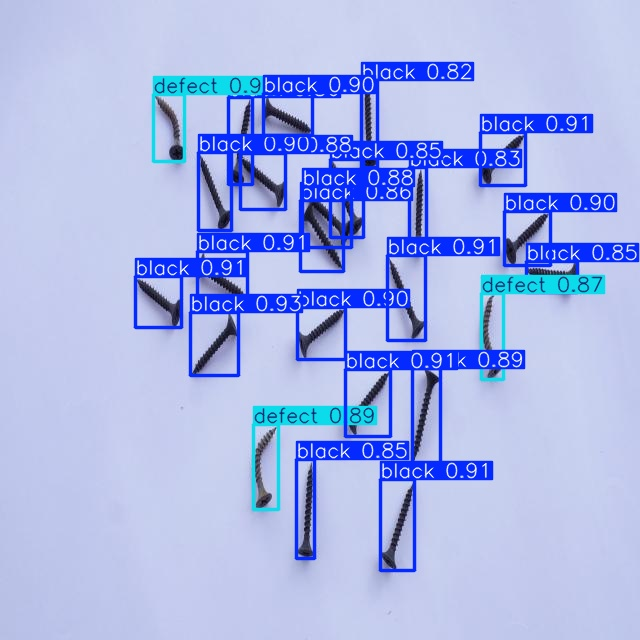

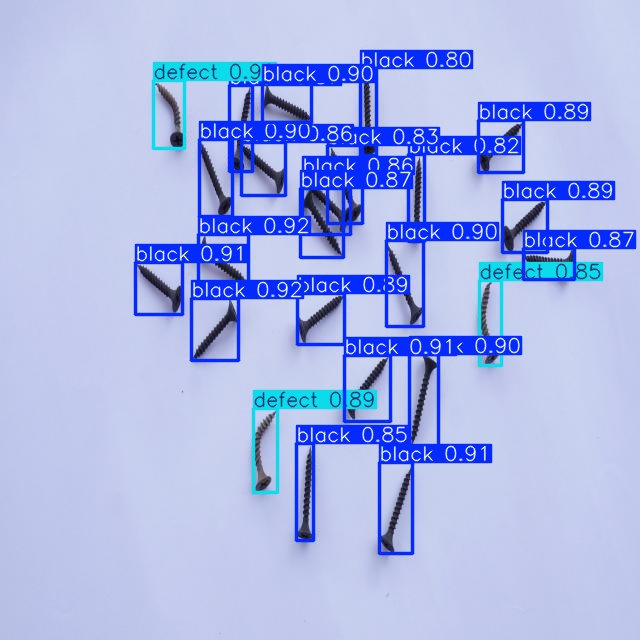

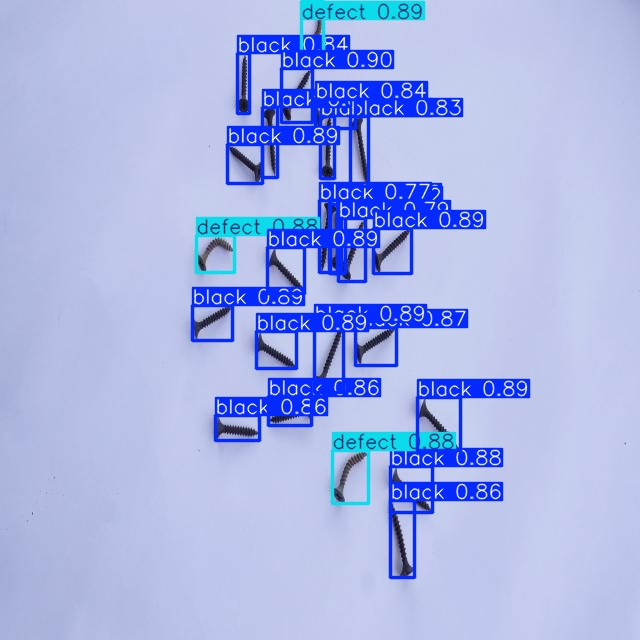

In [15]:
# Display predictions
display_predictions()

## **4. Model Registry and Deployment**

In [17]:
# Register Model and Promote to Production
from mlflow.tracking import MlflowClient

def register_model_version(run_id: str, model_name: str):
    """
    Registers a model version in MLflow using the given run ID and model name.

    Args:
        run_id (str): The MLflow run ID associated with the model.
        model_name (str): The name to give to the registered model.

    Returns:
        mlflow.entities.model_registry.ModelVersion or None:
            The registered model version if successful, otherwise None.
    """
    try:
        # Construct the model URI using the run ID
        model_uri = f'runs:/{run_id}/model'

        # Register the model with MLflow.
        model_details = mlflow.register_model(
            model_uri=model_uri,
            name=model_name
        )

        print(f'Model registered successfully with version: {model_details.version}')

        # Optionally, add a description to the registered model
        client = mlflow.MlflowClient()
        client.update_registered_model(
            name=model_name,
            description='YOLO-based defect detection model'
        )

        return model_details  # Return the registered model details

    except Exception as error:
        print(f'Error registering model: {str(error)}')

        return None  # Return None if registration fails

def promote_challenger_to_production(model_name: str, prod_name: str):
    """
    Promotes a challenger model to production with a new name.

    Args:
        model_name (str): The name of the challenger model (with the "challenger" alias).
        prod_name (str): The new name for the production model.

    Returns:
        mlflow.entities.model_registry.ModelVersion or None:
            The production model version if successful, otherwise None.
    """
    try:
        client = MlflowClient()  # Create an MLflow client

        # Construct the URI for the challenger model
        current_model_uri = f"models:/{model_name}@challenger"

        # Copy the challenger model version to the production model name.
        production_model = client.copy_model_version(
            src_model_uri=current_model_uri,
            dst_name=prod_name
        )

        print(f'Successfully promoted challenger to Production as {prod_name}')

        return production_model  # Return the production model details

    except Exception as error:
        print(f'Error promoting model: {str(error)}')

        return None  # Return None if promotion fails

# Register Model Operation
def register_model_operation(run_id: str, config: dict):
    """
    Registers the model using the given run ID and configuration.

    Args:
        run_id (str): The MLflow run ID associated with the model.
        config (dict): The configuration dictionary containing model details.

    Returns:
        mlflow.entities.model_registry.ModelVersion or None:
            The registered model version if successful, otherwise None.
    """
    model_name = generate_model_name(config)  # Generate the model name using the config

    model_details = register_model_version(run_id, model_name)  # Register the model version

    if model_details:  # Check if registration was successful
        print('\nModel Registration Details:')
        print(f'Name: {model_details.name}')
        print(f'Version: {model_details.version}')
        print(f'Stage: {model_details.status}')

        return model_details  # Return the model details if registration was successful

    return None  # Return None if registration failed

# Promote Challenger Model
def promote_challenger_operation(model_name: str, prod_name: str = 'defect-detection-production'):
    """
    Promotes the challenger model to production.

    Args:
        model_name (str): The name of the challenger model.
        prod_name (str, optional): The name for the production model.
                                    Defaults to 'defect-detection-production'.

    Returns:
        mlflow.entities.model_registry.ModelVersion or None:
            The production model version if successful, otherwise None.A
    """
    production_model = promote_challenger_to_production(model_name, prod_name)  # Promote the model

    if production_model:  # Check if promotion was successful
        print(f'\nProduction Model Details:')
        print(f'Name: {production_model.name}')
        print(f'Version: {production_model.version}')

        return production_model  # Return the production model details if promotion was successful

    return None  # Return None if promotion failed

### **Model Registration**
- `register_model_version()`: Registers model in MLflow
- `register_model_operation()`: Handles model registration workflow
- To get the "run_id"
  - go to https://dagshub.com/erwincarlogonzales/defect-detection-yolov11.mlflow
  - defect-detection-yolov11s-android
  - select model from Run Name
  - copy Run ID

In [ ]:
# Register Model
run_id = 'd38b52caabf0472283ec1e6bff5a34bf'  # Get the run ID from the MLflow UI
model_details = register_model_operation(run_id, CONFIG)  # Register the model using the run ID and configuration

Successfully registered model 'yolo11s-33-50'.
2025/01/26 14:10:31 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: yolo11s-33-50, version 1
Created version '1' of model 'yolo11s-33-50'.


Model registered successfully with version: 1

Model Registration Details:
Name: yolo11s-33-50
Version: 1
Stage: READY


### **Production Deployment**
- `promote_challenger_to_production()`: Promotes model to production
- `promote_challenger_operation()`: Manages promotion workflow
- To label a model `challenger`
  - go to https://dagshub.com/erwincarlogonzales/defect-detection-yolov11.mlflow
  - defect-detection-yolov11s-android
  - select model from Run Name
  - Models
  - yolo11s-40-50 (version 4)
  - edit "Aliases" to `challenger`

In [19]:
# Promotion (after setting challenger alias in UI)
if model_details:  # Proceed with promotion only if model registration was successful
    prod_name = 'defect-detection-v11-android-production'  # Define the desired name for the production model
    production_model = promote_challenger_operation(model_details.name, prod_name)  # Promote the challenger model to production

Successfully promoted challenger to Production as defect-detection-v11-android-production

Production Model Details:
Name: defect-detection-v11-android-production
Version: 2


Registered model 'defect-detection-v11-android-production' already exists. Creating a new version of this model...
Copied version '1' of model 'yolo11s-33-50' to version '2' of model 'defect-detection-v11-android-production'.


## **5. Summary of Results**

## **Model Performance Analysis - 30 vs 40 vs 100 Epochs**

### Training Metrics Comparison

### Loss Metrics
- **box_loss**: All models show similar convergence patterns, with diminishing returns after epoch 20
  - 100 epochs: Final value ~0.45
  - 40 epochs: Final value ~0.52
  - 30 epochs: Final value ~0.54
  
- **cls_loss**: Consistent downward trend across all models
  - 100 epochs: Final value ~0.25
  - 40 epochs: Final value ~0.28
  - 30 epochs: Final value ~0.29

- **dfl_loss**: Similar convergence patterns
  - 100 epochs: Final value ~0.85
  - 40 epochs: Final value ~0.83
  - 30 epochs: Final value ~0.84

### Performance Metrics
- **Precision(B)**:
  - 100 epochs: ~0.99
  - 40 epochs: ~0.99
  - 30 epochs: ~0.98

- **Recall(B)**:
  - 100 epochs: ~0.99
  - 40 epochs: ~0.99
  - 30 epochs: ~0.98

- **mAP50(B)**:
  - 100 epochs: ~0.985
  - 40 epochs: ~0.985
  - 30 epochs: ~0.98

- **mAP50-95(B)**:
  - 100 epochs: ~0.89
  - 40 epochs: ~0.87
  - 30 epochs: ~0.86

### Champion Model Recommendation

Based on the cost-performance analysis, the **40-epoch model** is recommended as the champion model for the following reasons:

1. **Efficiency**:
   - Training time is 60% less than the 100-epoch model
   - Resource utilization is significantly better

2. **Performance Parity**:
   - Almost identical precision and recall metrics to 100-epoch model
   - mAP50 performance matches the 100-epoch model
   - Only marginal difference in mAP50-95 (~0.02 lower)

3. **Convergence**:
   - Most metrics show stable convergence by epoch 30-35
   - Additional 60 epochs in the 100-epoch model provide minimal improvements

4. **Practical Benefits**:
   - Faster iteration cycles for model improvements
   - Lower computational costs
   - Better environmental impact due to reduced training time

The marginal performance gains from extending to 100 epochs do not justify the additional computational cost and training time. The 40-epoch model achieves an optimal balance between performance and resource utilization.

## Model Performance Analysis - Confidence Threshold Comparison
### Epochs 30 & 40: Confidence Threshold 0.25 vs 0.50

### Performance Metrics Impact

#### Confidence Threshold 0.25
- Higher detection rate but increased false positives
- Diagonal elements in confusion matrix show higher numbers
- More background misclassifications
- Notable misclassifications:
  - Rivet: 17 background misclassifications
  - Long screw: 10 background misclassifications
  - Total off-diagonal elements higher

#### Confidence Threshold 0.50
- More conservative predictions
- Diagonal elements slightly lower but cleaner
- Fewer background misclassifications
- Key improvements:
  - Rivet: reduced to 16 background misclassifications
  - Long screw: reduced to 6 background misclassifications
  - Better overall precision

### Training Metrics Comparison
Both confidence thresholds show similar training patterns:
- Box loss convergence is consistent
- Classification loss shows expected decline
- DFL loss stabilizes similarly

### Key Differences

1. **Precision vs Recall Trade-off**:
   - 0.25 threshold: Higher recall, lower precision
   - 0.50 threshold: Better precision, slightly lower recall
   
2. **Background Handling**:
   - 0.25 threshold: More aggressive detection, more background confusion
   - 0.50 threshold: Better background separation, cleaner predictions

3. **Class-specific Performance**:
   - 0.50 threshold shows better performance for smaller objects
   - 0.25 threshold better at detecting partially occluded objects

### Recommendation

The **0.50 confidence threshold** is recommended for both 30 and 40 epoch models because:

1. **Quality of Predictions**:
   - Better precision in real-world applications
   - Reduced false positive rate
   - More reliable for deployment

2. **Operational Benefits**:
   - Cleaner predictions mean less post-processing needed
   - Better suited for industrial applications where false positives are costly
   - More robust against background noise

3. **Resource Efficiency**:
   - More conservative predictions mean less computational overhead in post-processing
   - Better suited for real-time applications

The slight reduction in recall is a worthwhile trade-off for the significant improvement in prediction quality and reduction in false positives.